In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !pip install -U ipython
    !pip install roboticstoolbox-python
    !pip install machinevision-toolbox-python
else:
    print('Not running on CoLab')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

%matplotlib ipympl
import matplotlib.pyplot as plt


# add RTB examples folder to the path
import sys
import os.path
import roboticstoolbox as rtb
sys.path.append(os.path.join(rtb.__path__[0], 'examples'))

# ------ standard imports ------ #
import numpy as np
from scipy import linalg
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *


Not running on CoLab


# B Linear Algebra


## B.2 Matrices


### B.2.1 Square Matrices


This demo shows a red unit vector rotating like the minute hand of a clock.  The blue vector is its linear transformation.  Twice per revolution the vectors are parallel and the red vector on those occasions are eigenvectors.  The relative scale of the blue vector is the eigenvalue.

Change the four numbers to see what happens with a different transformation matrix, they are the four matrix elements given row-wise.

Hit the interrupt button to stop the animation.

matrix A =
[[       1        2]
 [       3        4]]
λ1 = -0.372, x1 = [ -0.8246   0.5658]
λ2 = 5.372, x2 = [  -0.416  -0.9094]


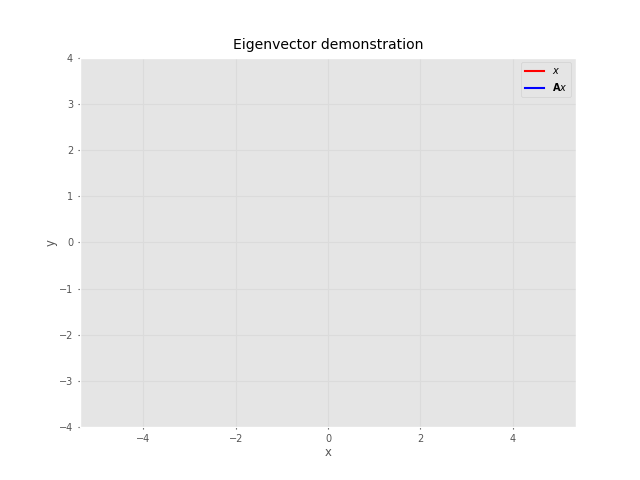

In [4]:
%run -m eigdemo 1 2 3 4

# C Geometry


## C.1 Euclidean Geometry


### C.1.2 Lines


#### C.1.2.2 Lines in 3D and Plücker Coordinates


In [3]:
P = [2, 3, 4]; Q = [3, 5, 7];

In [5]:
L = Line3.Join(P, Q)

{ 1 -2 1; -1 -2 -3}

In [6]:
L.v.T
L.w.T

array([      -1,       -2,       -3])

In [7]:
L.skew()

array([[       0,        1,        2,       -1],
       [      -1,        0,        1,       -2],
       [      -2,       -1,        0,       -3],
       [       1,        2,        3,        0]])

Axes3DSubplot(0.125,0.125;0.775x0.755)


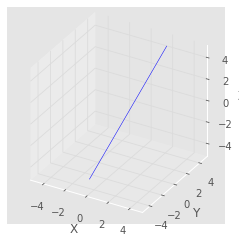

In [8]:
plotvol3([-5, 5]);
L.plot("b");

In [9]:
L.point([0, 1, 2])

array([[  0.5714,   0.3042,  0.03691],
       [  0.1429,  -0.3917,  -0.9262],
       [ -0.2857,   -1.087,   -1.889]])

In [10]:
[x, d] = L.closest_to_point([1, 2, 3])
x
d

0.6546536707079771

In [11]:
p, _ = L.intersect_plane([0, 0, 1, 0])
p

array([  0.6667,   0.3333,        0])

### C.1.4 Ellipses and Ellipsoids


In [12]:
E = np.array([[1, 1], [1, 2]])

array([[1, 1],
       [1, 2]])

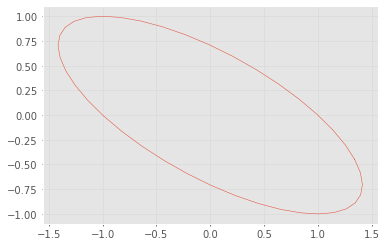

In [13]:
plot_ellipse(E)

In [14]:
e, v = np.linalg.eig(E)
e
v

array([[ -0.8507,  -0.5257],
       [  0.5257,  -0.8507]])

In [15]:
r = 1 / np.sqrt(e)

array([   1.618,    0.618])

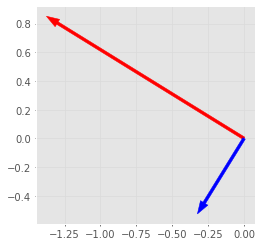

In [19]:
plot_arrow((0, 0), v[:,0]*r[0], color="r", width=0.02);
plot_arrow((0, 0), v[:,1]*r[1], color="b", width=0.02);
plt.gca().set_aspect('equal', 'box')

In [21]:
np.rad2deg(np.arctan2(v[1, 0], v[0, 0]))

148.282525588539

### C.1.4.1 Drawing an Ellipse


In [22]:
E = np.array([[1, 1], [1, 2]]);

In [23]:
th = np.linspace(0, 2*pi, 50);
y = np.vstack([np.cos(th), np.sin(th)]);

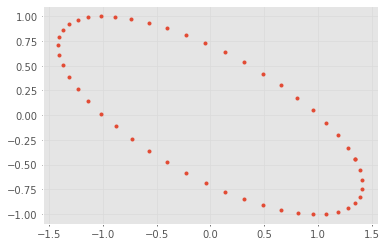

In [24]:
x = linalg.sqrtm(np.linalg.inv(E)) @ y;
plt.plot(x[0, :], x[1, :], '.');

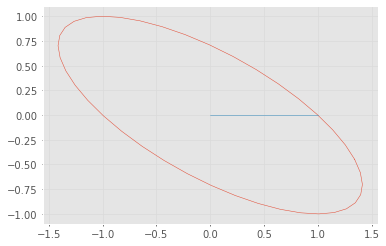

In [25]:
plot_ellipse(E, [0, 0])

#### C.1.4.2 Fitting an Ellipse to Data


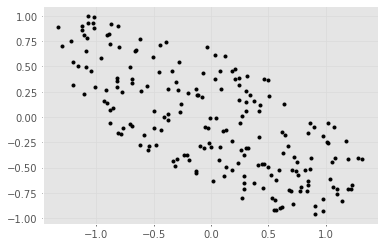

In [26]:
rng = np.random.default_rng(0);
# create 200 random points inside the ellipse
x = [];
while len(x) < 200: 
  p = rng.uniform(low=-2, high=2, size=(2,1))
  if np.linalg.norm(p.T @ E @ p) <= 1:
    x.append(p)
x = np.hstack(x);  # create 2 x 50 array
plt.plot(x[0, :], x[1, :], "k."); # plot them
# compute the moments
m00 = mpq_point(x, 0, 0);
m10 = mpq_point(x, 1, 0);
m01 = mpq_point(x, 0, 1);
xc = np.c_[m10, m01] / m00;
# compute the central second moments
x0 = x - xc.T;
u20 = mpq_point(x0, 2, 0);
u02 = mpq_point(x0, 0, 2);
u11 = mpq_point(x0, 1, 1);
# compute inertia tensor and ellipse matrix
J = np.array([[u20, u11], [u11, u02]]);
E_est = m00 / 4 * np.linalg.inv(J);

In [29]:
print(f'E:\n {E}')
print(f'Eest:\n {E_est}')

E:
 [[1 1]
 [1 2]]
Eest:
 [[   1.053    1.038]
 [   1.038     1.98]]


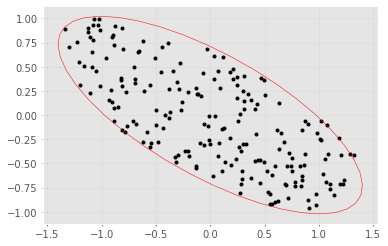

In [30]:
plt.plot(x[0, :], x[1, :], "k."); # plot data points
plot_ellipse(E_est, "r")          # plot fitted ellipse

## C.2 Homogeneous Coordinates


### C.2.1 Two Dimensions


#### C.2.1.1 Points and lines


In [31]:
l1 = [1, -1, 0];
l2 = [1, -1, -1];

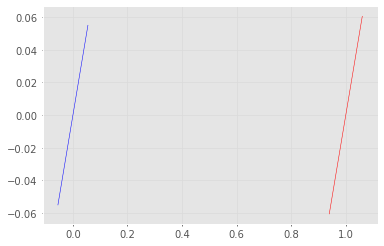

In [32]:
plot_homline(l1, "b");
plot_homline(l2, "r");

In [33]:
np.cross(l1, l2)

array([1, 1, 0])

# E Linearizations, Jacobians and Hessians

## E.4 Deriving Jacobians


In [34]:
zrange = lambda xi, xv, w: np.array([
           np.linalg.norm(xi - xv[:2]) + w[0],
           np.arctan((xi[1] - xv[1]) / (xi[0] - xv[0])) -xv[2] + w[1]]);

In [35]:
xv = np.r_[1, 2, pi/3]; xi = np.r_[10, 8]; w = np.r_[0, 0];
h0 = zrange(xi, xv, w)
d = 0.001;
J = np.column_stack([
       zrange(xi, xv + [d, 0, 0], w) - h0,
       zrange(xi, xv + [0, d, 0], w) - h0,
       zrange(xi, xv + [0, 0, d], w) - h0
                    ]) / d

array([[  -0.832,  -0.5547,        0],
       [ 0.05129, -0.07693,       -1]])

In [36]:
numjac(lambda x: zrange(xi, x, w), xv)

array([[ -0.8321,  -0.5547,        0],
       [ 0.05128, -0.07692,       -1]])

In [40]:
from sympy import Matrix, MatrixSymbol, sqrt, atan, simplify, pycode
xi = MatrixSymbol("xi", 2, 1)
xv = MatrixSymbol("xv", 3, 1)
w = Matrix([0, 0]);

In [41]:
zrange = lambda xi, xv, w: Matrix([
            sqrt((xi[0] - xv[0])**2 + (xi[1] - xv[1])**2) + w[0],
            atan((xi[1] - xv[1]) / (xi[0] - xv[0])) -xv[2] + w[1]]);
z = zrange(xi, xv, w)

Matrix([
[   sqrt((xi[0, 0] - xv[0, 0])**2 + (xi[1, 0] - xv[1, 0])**2)],
[atan((xi[1, 0] - xv[1, 0])/(xi[0, 0] - xv[0, 0])) - xv[2, 0]]])

In [42]:
J = z.jacobian(xv)

Matrix([
[                        (-xi[0, 0] + xv[0, 0])/sqrt((xi[0, 0] - xv[0, 0])**2 + (xi[1, 0] - xv[1, 0])**2),   (-xi[1, 0] + xv[1, 0])/sqrt((xi[0, 0] - xv[0, 0])**2 + (xi[1, 0] - xv[1, 0])**2),  0],
[(xi[1, 0] - xv[1, 0])/((1 + (xi[1, 0] - xv[1, 0])**2/(xi[0, 0] - xv[0, 0])**2)*(xi[0, 0] - xv[0, 0])**2), -1/((1 + (xi[1, 0] - xv[1, 0])**2/(xi[0, 0] - xv[0, 0])**2)*(xi[0, 0] - xv[0, 0])), -1]])

In [43]:
J.shape

(2, 3)

# F Solving Systems of Equations


## F.1 Linear Problems


### F.1.1 Nonhomogeneous Systems


In [46]:
A = np.array([[1, -2], [1, 1]]);
b = np.array([[8], [5]]);
x = linalg.solve(A, b)

array([[       6],
       [      -1]])

### F.1.2 Homogeneous Systems


### F.1.3 Finding a Rotation Matrix


flesh this out

# G Gaussian Random Variables

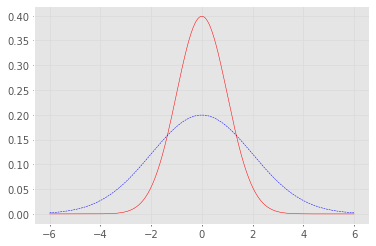

In [47]:
x = np.linspace(-6, 6, 500);
plt.plot(x, gauss1d(0, 1, x), "r");
plt.plot(x, gauss1d(0, 2**2, x), "b--");

In [51]:
mu = 10; sigma = 2;
g = np.random.normal(loc=mu, scale=sigma, size=(100,))

array([   13.77,    7.304,    7.459,    11.94,    7.654,    13.89,    9.173,    8.505,    13.85,    12.96,    13.74,
          11.81,    8.278,    13.82,    9.464,     11.6,    11.89,     9.69,    11.23,    11.84,    10.75,    7.801,
           10.6,    12.65,    8.611,    9.701,     9.13,     13.7,    11.34,    10.81,     8.46,    11.08,    8.651,
          10.06,    8.728,    11.35,    11.15,    9.583,    10.79,    7.814,    7.017,    10.88,    10.33,    11.27,
          14.77,    11.89,    8.174,    12.23,    7.368,    9.077,    9.864,    13.43,     8.51,    8.347,    9.803,
          8.673,    12.25,     7.84,    7.705,    9.124,    9.004,    13.86,     11.9,    10.18,    7.549,    11.69,
              8,     6.91,    12.38,    10.63,    11.84,    10.64,    11.71,    8.698,    7.932,    11.36,    8.393,
          8.621,    9.089,    10.03,    9.292,     7.25,    8.713,    5.553,    11.25,    6.796,    7.791,     10.1,
          8.521,    13.09,    7.414,    10.53,    9.921,    7.66

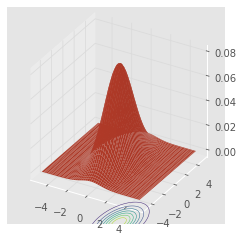

In [52]:
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100));
P = np.diag([1, 2])**2;
g = gauss2d([0, 0], P, x, y);
ax = ax = plotvol3();
ax.plot_surface(x, y, g);
ax.contour(x, y, g, zdir="z", offset=-0.05);

In [ ]:
from scipy.stats.distributions import chi2
chi2.ppf(0.5, 2)

# H Kalman Filter


## H.2 Nonlinear Systems -- Extended Kalman Filter


In [54]:
x = np.random.normal(5, 2, size=(1_000_000,));

In [55]:
y = (x + 2)**2 / 4;

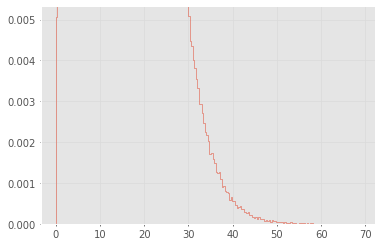

In [56]:
plt.hist(y, bins=200, density=True, histtype="step");

# I Graphs


In [57]:
import pgraph
g = pgraph.UGraph()

In [58]:
np.random.seed(0)  # ensure repeatable results
for i in range(5):
  g.add_vertex(np.random.rand(2));

In [59]:
g[1]

UVertex[#1, coord=(0.6028, 0.5449)]

In [60]:
g["#1"]

UVertex[#1, coord=(0.6028, 0.5449)]

In [61]:
g.add_edge(g[0], g[1]);
g.add_edge(g[0], g[2]);
g.add_edge(g[0], g[3]);
g.add_edge(g[1], g[2]);
g.add_edge(g[1], g[3]);
g.add_edge(g[3], g[4]);

In [62]:
print(g)

UGraph: 5 vertices, 6 edges, 1 component


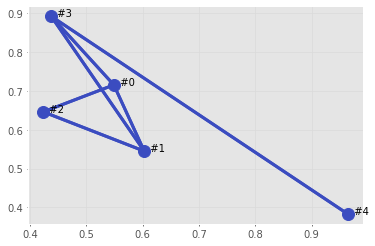

In [63]:
g.plot()

In [64]:
g[1].adjacent()

[UVertex[#0, coord=(0.5488, 0.7152)],
 UVertex[#2, coord=(0.4237, 0.6459)],
 UVertex[#3, coord=(0.4376, 0.8918)]]

In [65]:
g[1].edges()

[Edge{[#0] -- [#1], cost=0.1786},
 Edge{[#1] -- [#2], cost=0.2056},
 Edge{[#1] -- [#3], cost=0.3842}]

In [66]:
g[1].edges()[0].endpoints

[UVertex[#0, coord=(0.5488, 0.7152)], UVertex[#1, coord=(0.6028, 0.5449)]]

In [67]:
g[1].edges()[0].cost

0.1786470956951876

In [68]:
g.closest((0.5, 0.5))

(UVertex[#1, coord=(0.6028, 0.5449)], 0.11213746732281339)

In [69]:
path, length, _ = g.path_Astar(g[2], g[4])
path

[UVertex[#2, coord=(0.4237, 0.6459)],
 UVertex[#0, coord=(0.5488, 0.7152)],
 UVertex[#3, coord=(0.4376, 0.8918)],
 UVertex[#4, coord=(0.9637, 0.3834)]]

In [70]:
length

1.0832988437645112

# J Peak Finding


## J.1 1D Signal


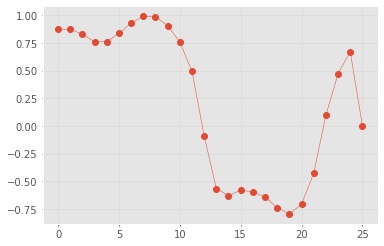

In [75]:
from machinevisiontoolbox import mvtb_load_matfile, findpeaks, findpeaks2d
y = mvtb_load_matfile("data/peakfit.mat")["y"];
plt.plot(y, "-o");

In [76]:
k = np.argmax(y)

7

In [77]:
y[k]

0.9905149093257015

In [78]:
k, ypk = findpeaks(y)
k
ypk

array([  0.9905,   0.6718,  -0.5799])

In [79]:
ypk[1] / ypk[0]

0.6782737789880113

In [80]:
findpeaks(y, interp=True)

(array([   7.439,    23.73,    15.24]), array([  0.9969,   0.7037,   -0.578]))

In [81]:
findpeaks(y, scale=5)

(array([7]), array([  0.9905]))

## J.2 2D Signal


In [82]:
img = mvtb_load_matfile("data/peakfit.mat")["image"]

array([[ -0.0696,  0.03483,   0.1394,   0.2436,    0.348],
       [    0.08,   0.3754,   0.3202,     0.44,     0.56],
       [ 0.04003,   0.1717,   0.3662,   0.4117,     0.52],
       [0.0002136,   0.2062,   0.8766,   0.4462,   0.4802],
       [-0.03997,  0.09166,   0.2862,   0.3317,     0.44],
       [   -0.08,  0.04003,   0.1602,     0.28,      0.4]])

In [83]:
k = np.argmax(img)

17

In [84]:
img.ravel()[k]

0.8766197723675814

In [85]:
np.unravel_index(k, img.shape)

(3, 2)

In [86]:
xy = findpeaks2d(img)

array([[       2,        3,   0.8766],
       [       1,        1,   0.3754]])

In [87]:
xy = findpeaks2d(img, interp=True)

array([[   2.109,    2.964,   0.8839,   0.5505],
       [   1.343,    1.126,   0.4003,   0.1753]])